In [1]:
#working with data
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Scikit-learn features various classification, regression and clustering algorithms
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report,f1_score

## Scaling
from sklearn.preprocessing import StandardScaler

## Algo
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading Data
Data = pd.read_csv("/Users/radhamahesh/Desktop/AI-ML Materials/Data - Parkinsons.csv")


In [3]:
Data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [4]:
Data.shape

(195, 24)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
Data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
Data.describe

<bound method NDFrame.describe of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     

In [7]:
#overview of data
Data.describe().transpose()

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

The Average vocal fundamental frequency is almost normally distributed with more values ranging 115Hz and 130Hz.
The Maximum vocal fundamental frequency is a positive skewness with more values ranging 100Hz and 250Hz.
The Minimum vocal fundamental frequency is a positive skewness for minimum vocal fundemental frequency with more high values between 75Hz and 125Hhz.


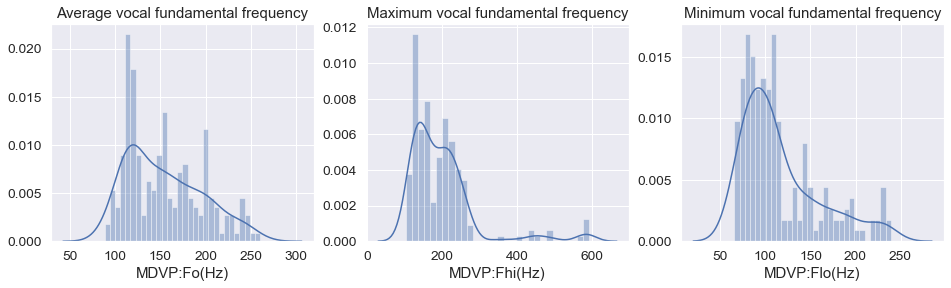

In [25]:
#Univariate analysis of Fundamental frequency
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
sns.distplot(Data['MDVP:Fo(Hz)'],bins=30,ax=axes[0])
sns.distplot(Data['MDVP:Fhi(Hz)'],bins=30,ax=axes[1])
sns.distplot(Data['MDVP:Flo(Hz)'],bins=30,ax=axes[2])
axes[0].set_title('Average vocal fundamental frequency')
axes[1].set_title('Maximum vocal fundamental frequency')
axes[2].set_title('Minimum vocal fundamental frequency')

#Observations:
print('The Average vocal fundamental frequency is almost normally distributed.')

print('The Maximum vocal fundamental frequency is positively skewed. It can be confirmed by skew values as well. See bottom')

print('The Minimum vocal fundamental frequency is positively skewed.It can be confirmed by skew values as well. See bottom')

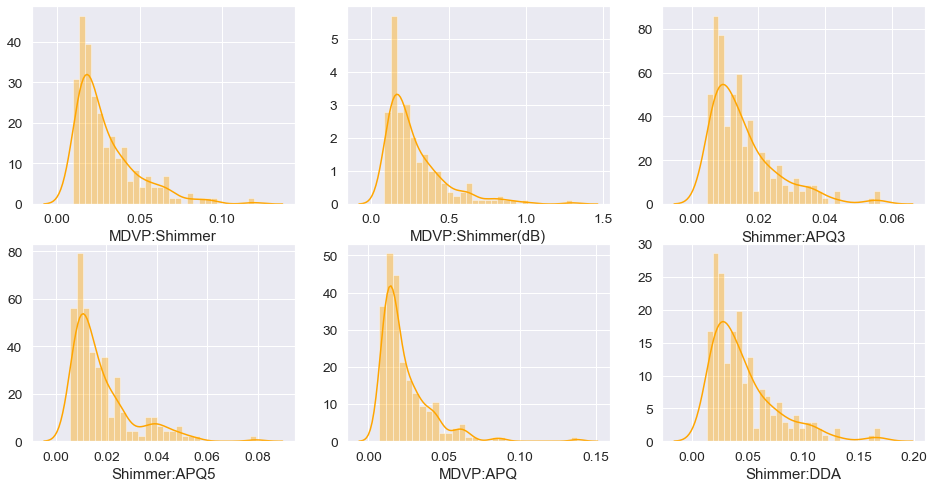

In [17]:
#Univariate analysis of  variation in amplitude
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
sns.distplot(Data['MDVP:Shimmer'],bins=30,ax=axes[0,0],color='orange')
sns.distplot(Data['MDVP:Shimmer(dB)'],bins=30,ax=axes[0,1],color='orange')
sns.distplot(Data['Shimmer:APQ3'],bins=30,ax=axes[0,2],color='orange')

sns.distplot(Data['Shimmer:APQ5'],bins=30,ax=axes[1,0],color='orange')
sns.distplot(Data['MDVP:APQ'],bins=30,ax=axes[1,1],color='orange')
sns.distplot(Data['Shimmer:DDA'],bins=30,ax=axes[1,2],color='orange')
#Observations
#From the below graphs, we can observe that all graphs have almost same distribution,and each graph is positively skewed

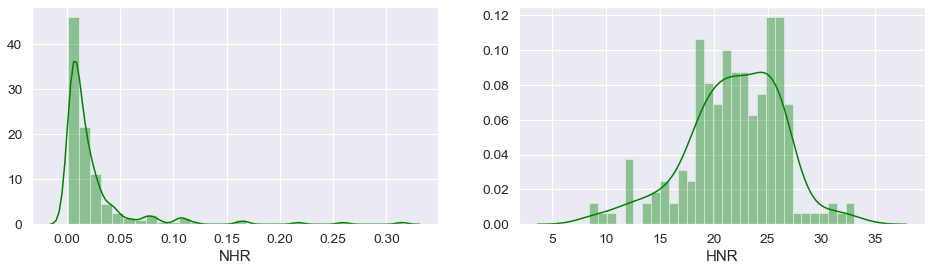

In [26]:
#analysis for measures of ratio of noise to tonal components in the voice
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.distplot(Data['NHR'],bins=30,ax=axes[0],color='green')
sns.distplot(Data['HNR'],bins=30,ax=axes[1],color='green')

#Observations
#NHR is right skewed and all values are very small.
#The value HNR is slightly negatively skewed

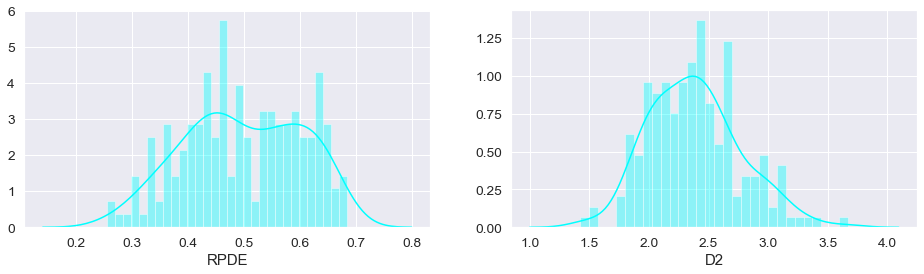

In [19]:
#analysis for nonlinear dynamical complexity measures
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.distplot(Data['RPDE'],bins=30,ax=axes[0],color='cyan')
sns.distplot(Data['D2'],bins=30,ax=axes[1],color='cyan')

#Observations:
#Both are normally distributed

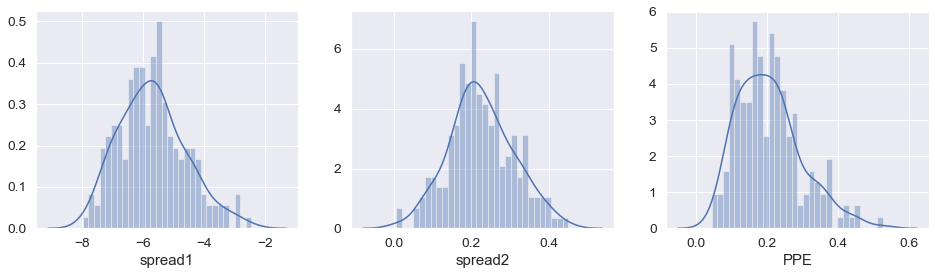

In [20]:
#Univariate analysis of nonlinear measures of fundamental frequency variation 
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
sns.distplot(Data['spread1'],bins=30,ax=axes[0])
sns.distplot(Data['spread2'],bins=30,ax=axes[1])
sns.distplot(Data['PPE'],bins=30,ax=axes[2])

#Observations
#All graphs tends to be normalised graph with few outliers


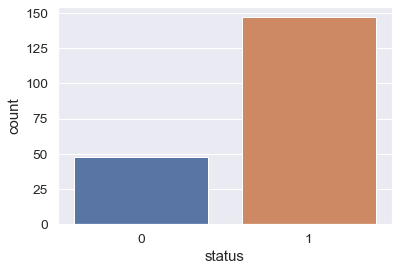

In [28]:
#Target variable analysis
sns.countplot(x=Data['status'])
#Observation
#Most of the people in the dataset have parkinsons.

In [21]:
#A Skewness value of 0 in the output denotes a symmetrical distribution
#A negative Skewness value in the output denotes tail is larger towrds left hand side of data so we can say left skewed
#A Positive Skewness value in the output denotes tail is larger towrds Right hand side of data so we can say Right skewed
Data.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

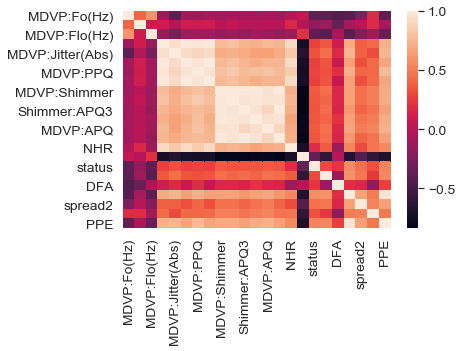

In [22]:
#We can use heat map to find the correlations coefficient values. we will remove the less correlation coefficient columns. We can remove the irrelavant features it will minimize the accuracy of an algorithm.
#It will be better if we take relavent features columns then we can achive to get good accuracy.

# Heatmap visualisation for each attribute coefficient correlation.
import seaborn as sb
corr = Data.corr()
sb.heatmap(corr)

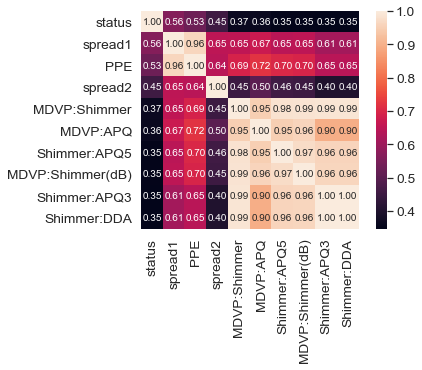

In [23]:
# Now visualise the heat map with correlation coefficient values for pair of attributes.
import matplotlib.pyplot as plt
import numpy as np

# K value means how many features required to see in heat map
k=10

# finding the columns which related to output attribute and we are arranging from top coefficient correlation value to downwards.
cols=corr.nlargest(k,'status')['status'].index

# correlation coefficient values
coff_values=np.corrcoef(Data[cols].values.T)
sb.set(font_scale=1.25)
sb.heatmap(coff_values,cbar=True,annot=True,square=True,fmt='.2f',
           annot_kws={'size': 10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In [24]:
# correlation coefficient values in each attributes.
correlation_values=Data.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

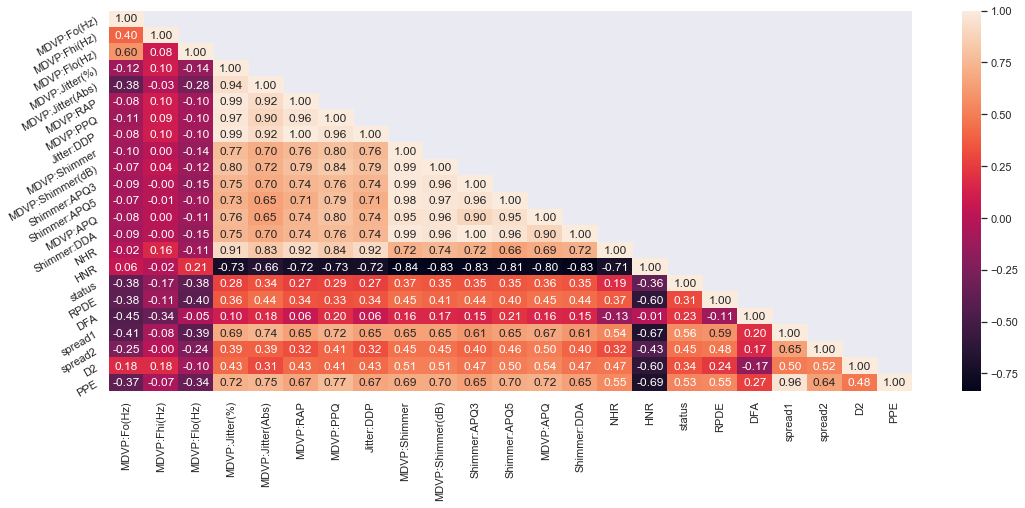

In [29]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [ ]:
#Observation
#MDVP:Jitter(%) have high correlation value with Jitter(Abs),MDVP:RAP,MDVP:PPQ,NHR

#HNR have High correlation with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ#,Shimmer:DDA

#MDVP:Shimmer has a very correlation with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA

#The target variable status has a weak positive corelation with spread1



Text(0.5, 1.0, 'Variation of Spread1 with Status')

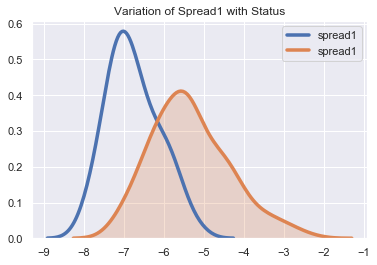

In [31]:
#Corelation of Spread1 with Target Variable
sns.kdeplot(Data[Data.status == 0]['spread1'], shade=False,)
sns.kdeplot(Data[Data.status == 1]['spread1'], shade=True)
plt.title("Variation of Spread1 with Status")

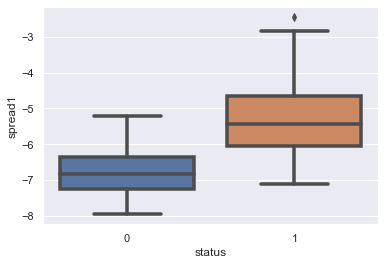

In [43]:
sns.boxplot(x='status',y='spread1',data=Data)

Text(0.5, 1.0, 'Variation of Spread2 with Status')

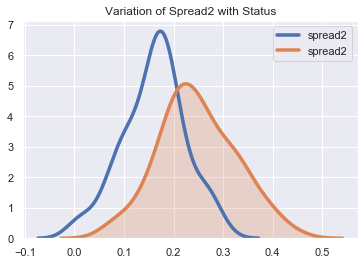

In [32]:
#Corelation of Spread2 with Target Variable
sns.kdeplot(Data[Data.status == 0]['spread2'], shade=False,)
sns.kdeplot(Data[Data.status == 1]['spread2'], shade=True)
plt.title("Variation of Spread2 with Status")

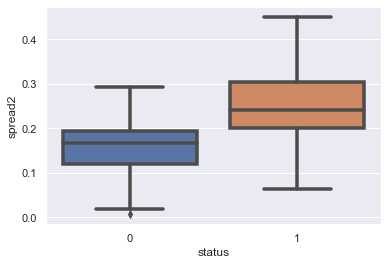

In [44]:
sns.boxplot(x='status',y='spread2',data=Data)

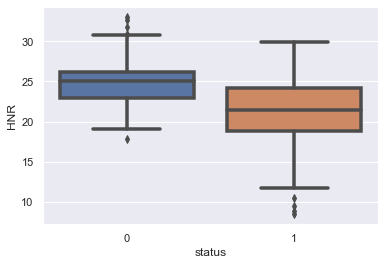

In [33]:
#variation of HNR with Target Variable
sns.boxplot(x='status',y='HNR',data=Data)

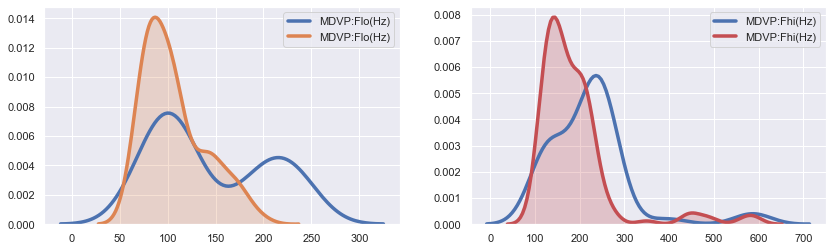

In [34]:
#variation of  Maximum, Minimum vocal fundamental frequency
fig, ax = plt.subplots(1,2,figsize=(14,4))
sns.kdeplot(Data[Data.status == 0]['MDVP:Flo(Hz)'], shade=False,ax=ax[0])
sns.kdeplot(Data[Data.status == 1]['MDVP:Flo(Hz)'], shade=True,ax=ax[0])

sns.kdeplot(Data[Data.status == 0]['MDVP:Fhi(Hz)'], shade=False,ax=ax[1])
sns.kdeplot(Data[Data.status == 1]['MDVP:Fhi(Hz)'], shade=True,color='r',ax=ax[1])

#Observation
#People with Minimum vocal fundamental frequency above 250 tend to not have Parkinson
#People with Maximum vocal fundamental frequency from 100-200  tend to have Parkinson

Observation:MDVP:Jitter(%) has weak correlation with Parkinson disease. If the MDVP:Jitter(%) > 0.005 there are more chances of the disease


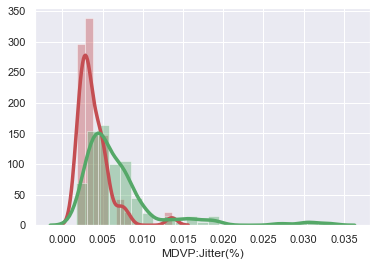

In [41]:
sns.distplot(Data[Data['status'] == 0]['MDVP:Jitter(%)'], color = 'r')
sns.distplot(Data[Data['status'] == 1]['MDVP:Jitter(%)'], color = 'g')
print('Observation:MDVP:Jitter(%) has weak correlation with Parkinson disease. If the MDVP:Jitter(%) > 0.005 there are more chances of the disease')

Text(0.5, 1.0, 'Variation of MDVP:Jitter(%) with Status')

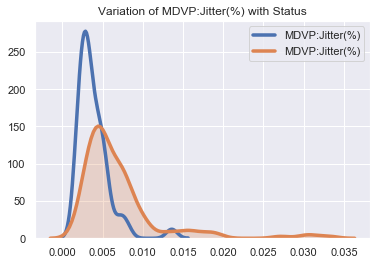

In [42]:
#variation of MDVP:Jitter(%) with Target Variable
sns.kdeplot(Data[Data.status == 0]['MDVP:Jitter(%)'], shade=False,)
sns.kdeplot(Data[Data.status == 1]['MDVP:Jitter(%)'], shade=True)
plt.title("Variation of MDVP:Jitter(%) with Status")

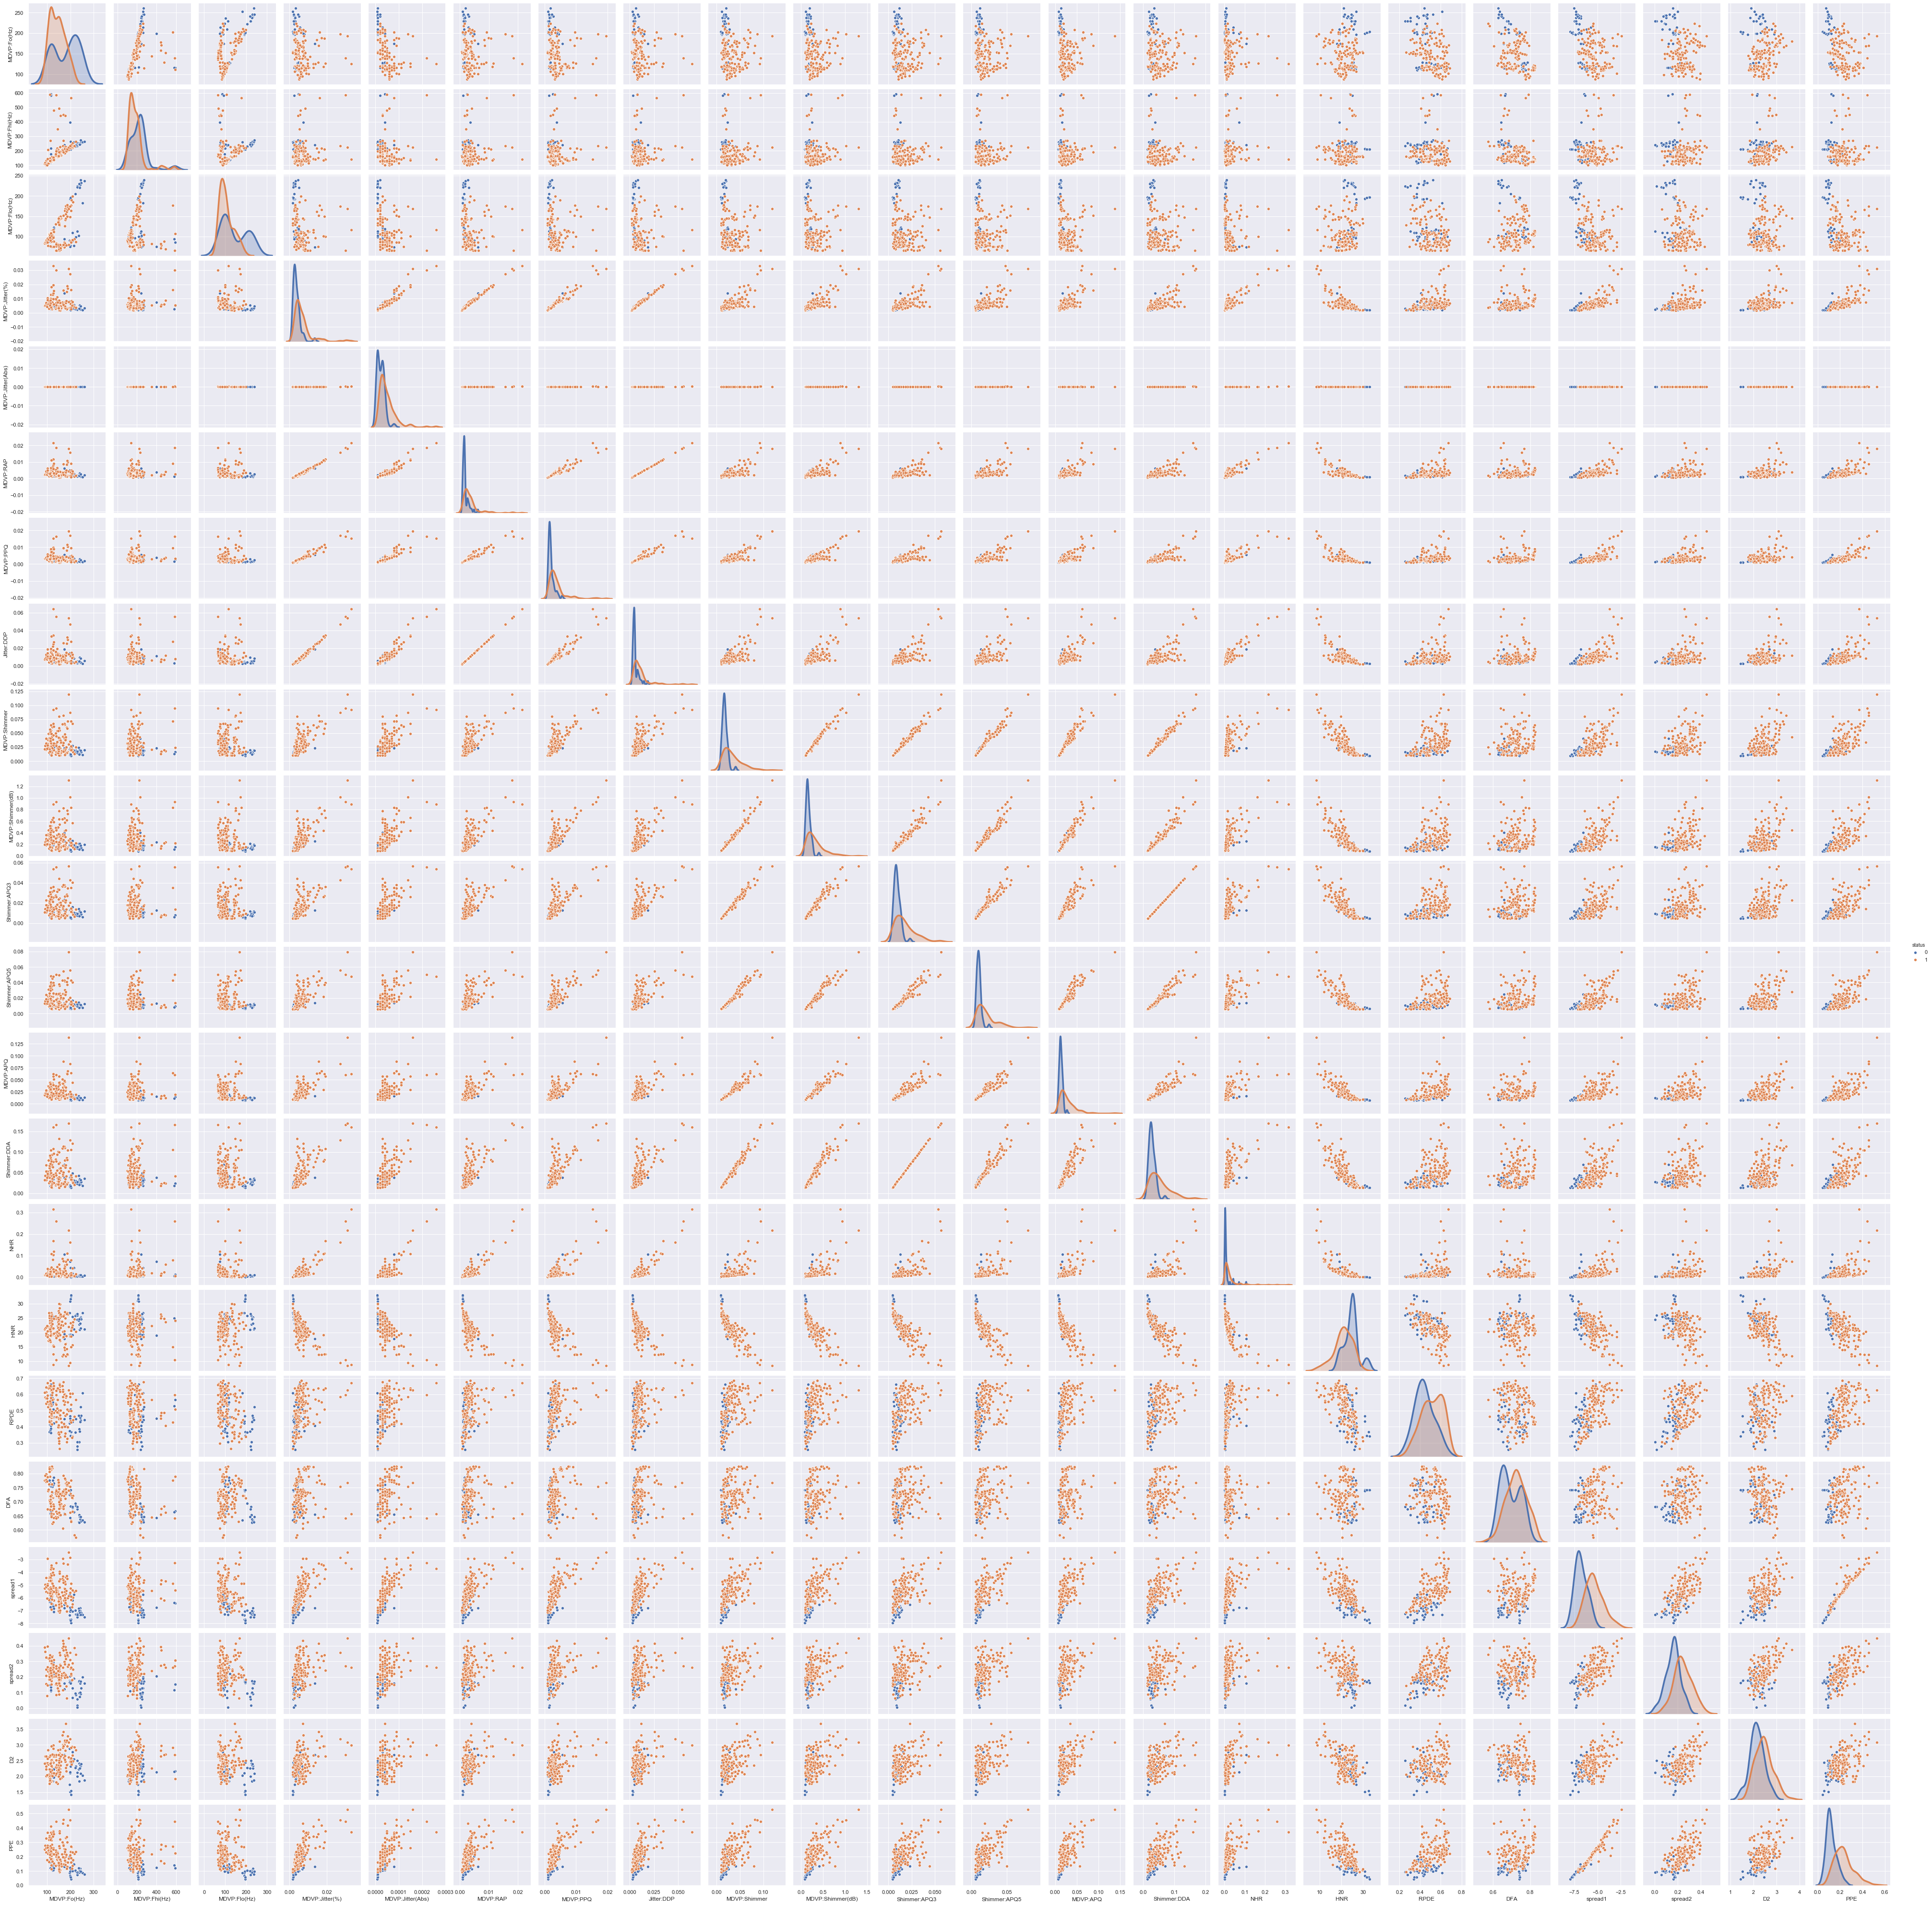

In [30]:
sns.pairplot(Data, hue = "status",diag_kind="kde")

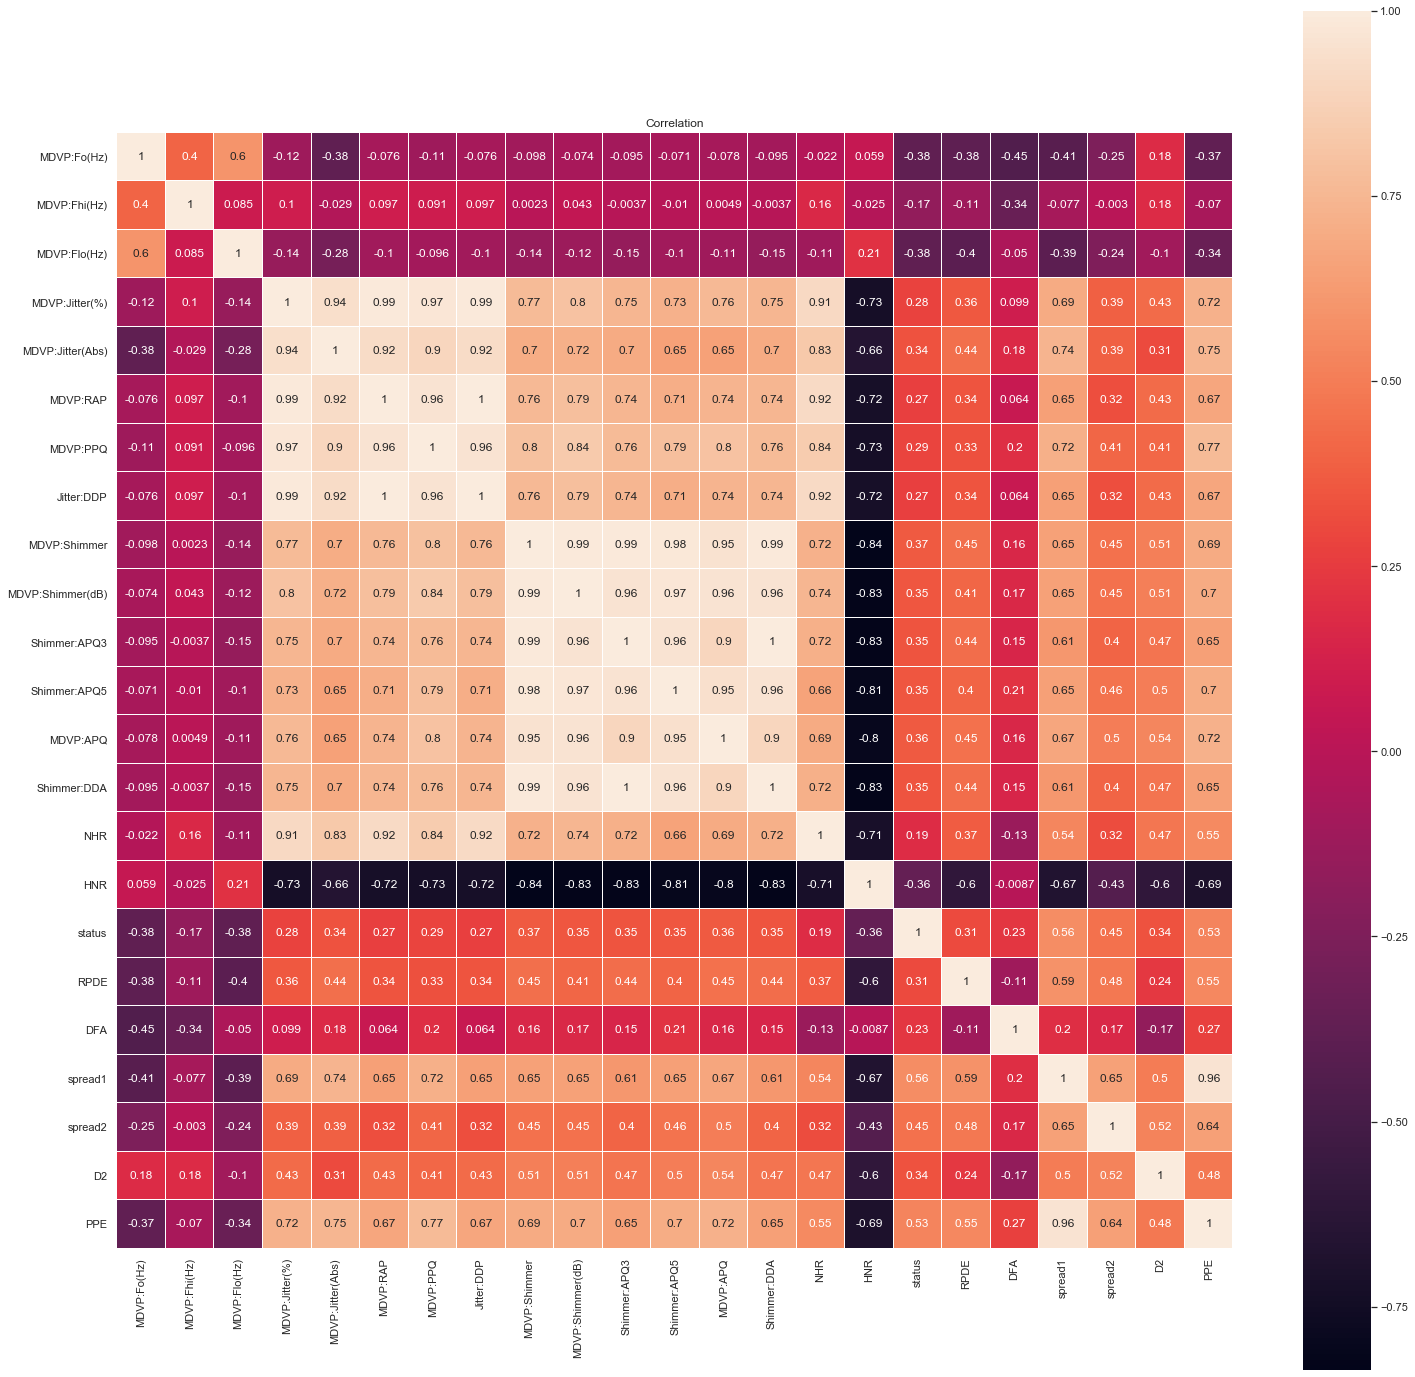

In [35]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
ax = sns.heatmap(Data.corr(), square=True, annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()


As you can see only columns like Income,CCavg and CD account have some kind of relation with the target column Personal Loan


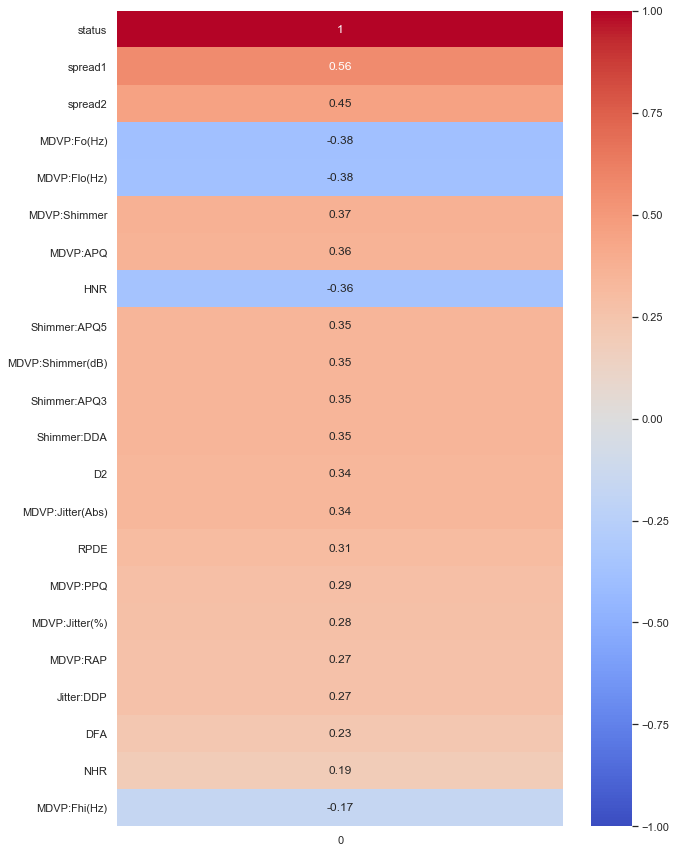

In [36]:
#correlation between all of the numeric variables in the data frame and the target column status
correlations = Data.corrwith(Data['status']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

print('As you can see only few columns have correlation with the target column Status')

In [46]:
print('Above is the correlation values in descending order, we have correlation values in each attribute so we are going to drop from MDVP:RAP column to MDVP:Fhi(Hz) because it has very weak correlation with the target column.')

print('If we remove unwanted columns it will improve the accuracy of the model')

Above is the correlation values in descending order, we have correlation values in each attribute so we are going to drop from MDVP:RAP column to MDVP:Fhi(Hz) because it has very weak correlation with the target column.
If we remove unwanted columns it will improve the accuracy of the model


In [11]:
# split the dataset into input and output attribute.

y=Data['status']
cols=['MDVP:RAP','Jitter:DDP','DFA','NHR','MDVP:Fhi(Hz)','name','status']
x=Data.drop(cols,axis=1)

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [50]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2        3         4         5        6  \
0  0.002755 -0.008622  0.001188  0.00002  0.002762  0.103346  0.96455   

          7         8         9        10        11        12        13  \
0  0.052843  0.064614  0.087679  0.158537  0.163764  0.488378  1.324457   

         14        15        16  intercept  
0  0.398085  2.096126  0.496139   0.617933  


In [51]:
model_score = model.score(X_test, Y_test)
print(model_score)

0.864406779661017


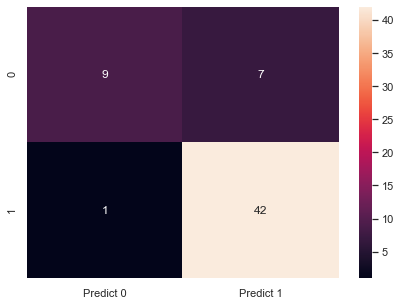

In [52]:
cm=metrics.confusion_matrix(Y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [59]:
# And some other metrics for Test
cr=classification_report(Y_test, y_Logit_pred, digits=2)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.62      0.71        16
           1       0.87      0.95      0.91        43

    accuracy                           0.86        59
   macro avg       0.85      0.79      0.81        59
weighted avg       0.86      0.86      0.86        59



In [63]:
#since there is lots of variety in the units of features let's scale it
scaler=StandardScaler().fit(X_train)
scaler_x_train=scaler.transform(X_train)

scaler=StandardScaler().fit(X_test)
scaler_x_test=scaler.transform(X_test)

In [64]:
# Train and Fit model
model = LogisticRegression(random_state=0)
model.fit(scaler_x_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
#predict the disease
y_Logit_pred = model.predict(scaler_x_test)
y_Logit_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [66]:
# Let's measure the accuracy of this model's prediction
print("confusion_matrix")
print(confusion_matrix(Y_test,y_Logit_pred))

confusion_matrix
[[10  6]
 [ 2 41]]


In [67]:
# And some other metrics for Test
cr=classification_report(Y_test, y_Logit_pred, digits=2)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.62      0.71        16
           1       0.87      0.95      0.91        43

    accuracy                           0.86        59
   macro avg       0.85      0.79      0.81        59
weighted avg       0.86      0.86      0.86        59



In [13]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 30 , weights = 'distance' )


In [14]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='distance')

In [15]:
# For every test data point, predict it's label based on 30 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, Y_test)


0.8305084745762712

Confusion Matrix


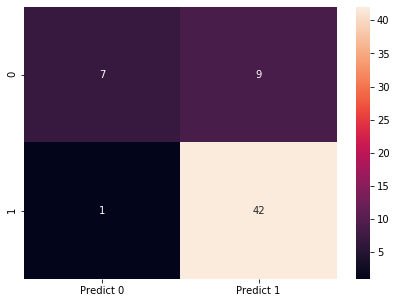

In [17]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(Y_test, predicted_labels, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [18]:
# evaluate Model Score
print(classification_report(Y_test, predicted_labels, digits=2))

              precision    recall  f1-score   support

           0       0.88      0.44      0.58        16
           1       0.82      0.98      0.89        43

    accuracy                           0.83        59
   macro avg       0.85      0.71      0.74        59
weighted avg       0.84      0.83      0.81        59



In [21]:
# KNN with scaled data
#creating odd list of K for KNN
myList = list(range(3,40,2))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 3,5....17
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate F1 Score
    scores = f1_score(Y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = myList[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


In [23]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric='euclidean')
# fitting the model
knn.fit(X_train, Y_train)

# predict the response
y_Knn_pred = knn.predict(X_test)

# Let's measure the accuracy of this model's prediction
print("confusion_matrix")
print(confusion_matrix(Y_test,y_Knn_pred))

confusion_matrix
[[13  3]
 [ 3 40]]


In [25]:
# evaluate Model Score
print(classification_report(Y_test, y_Knn_pred, digits=2))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.93      0.93      0.93        43

    accuracy                           0.90        59
   macro avg       0.87      0.87      0.87        59
weighted avg       0.90      0.90      0.90        59



In [89]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [30]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [31]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy on test set:",metrics.accuracy_score(Y_test, y_pred))

Accuracy on test set: 0.7796610169491526


Confusion Matrix


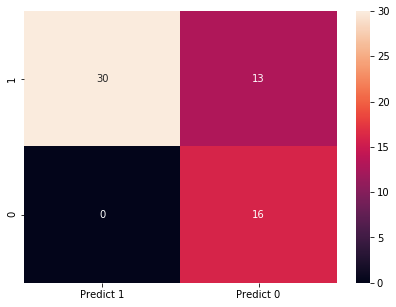

In [32]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(Y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [33]:
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.70      0.82        43
           0       0.55      1.00      0.71        16

    accuracy                           0.78        59
   macro avg       0.78      0.85      0.77        59
weighted avg       0.88      0.78      0.79        59



LogisticRegression : 0.860440 (0.089956)
knn : 0.778022 (0.126426)
SVC : 0.817033 (0.115752)
decision_tree : 0.852198 (0.079980)
Naive Bayes : 0.711538 (0.100122)


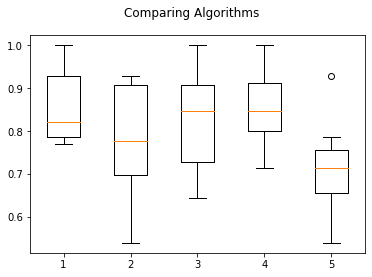

In [34]:
#Another method to compare models:

# Splitting the dataset into trianing and test set

train_size=0.70
test_size=0.30
seed=5

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=train_size,test_size=test_size,random_state=seed)

n_neighbors=3
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# keeping all models in one list
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('knn',KNeighborsClassifier(n_neighbors=n_neighbors)))
models.append(('SVC',SVC()))
models.append(("decision_tree",DecisionTreeClassifier()))
models.append(('Naive Bayes',GaussianNB()))

# Evaluating Each model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
error='accuracy'
for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    

# Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
plt.boxplot(predictions)
plt.show()

LogisticRegression : 0.860440 (0.089956)
knn : 0.778022 (0.126426)
SVC : 0.817033 (0.115752)
decision_tree : 0.837912 (0.054683)
Naive Bayes : 0.711538 (0.100122)


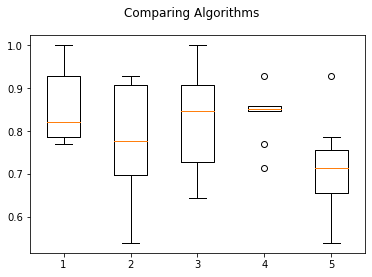

In [35]:
# Comparing Algorithms With StandardScaler Scaler
from sklearn.pipeline import Pipeline
from sklearn. preprocessing import StandardScaler
pipelines=[]
pipelines.append(('scaled Logisitic Regression',Pipeline([('scaler',StandardScaler()),('LogisticRegression',LogisticRegression())])))
pipelines.append(('scaled KNN',Pipeline([('scaler',StandardScaler()),('KNN',KNeighborsClassifier(n_neighbors=n_neighbors))])))
pipelines.append(('scaled SVC',Pipeline([('scaler',StandardScaler()),('SVC',SVC())])))
pipelines.append(('scaled DecisionTree',Pipeline([('scaler',StandardScaler()),('decision',DecisionTreeClassifier())])))
pipelines.append(('scaled naive bayes',Pipeline([('scaler',StandardScaler()),('scaled Naive Bayes',GaussianNB())])))

# Evaluating Each model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    

# Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
plt.boxplot(predictions)
plt.show()

In [36]:
#Another method to compare models
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')))
models.append(('SVM', SVC(gamma=0.05, C=3)))

# evaluate each model
results = []
names = []
scoring = 'f1'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=101)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	print("Name = %s , Mean F1-Score = %f, SD F1-Score = %f" % (name, cv_results.mean(), cv_results.std()))

Name = Logistic Regression , Mean F1-Score = 0.904951, SD F1-Score = 0.075430
Name = K-NN , Mean F1-Score = 0.864948, SD F1-Score = 0.054934
Name = SVM , Mean F1-Score = 0.914495, SD F1-Score = 0.029238


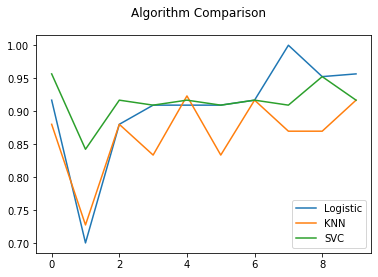

In [37]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.plot(results[0],label='Logistic')
plt.plot(results[1],label='KNN')
plt.plot(results[2],label='SVC')
plt.legend()
plt.show()

In [52]:
#Stacking the idea of stacking is to learn several different weak learners
# and combine them by training a meta-model to output predictions based on the multiple predictions
# returned by these weak models. So, we need to define two things in order to build our stacking model:
# the L learners we want to fit and the meta-model that combines them.

# defining level hetrogenious model
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier(n_neighbors = 17, weights = 'uniform', metric='euclidean')))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC(gamma=0.05, C=3)))
level0.append(('bayes', GaussianNB()))

# define meta learner model
level1 = SVC(gamma=0.05, C=3)

# define the stacking ensemble with cross validation of 5
Stack_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)


In [53]:
# predict the response
Stack_model.fit(X_train, Y_train)
prediction_Stack = Stack_model.predict(X_test)

In [54]:
# Let's measure the accuracy of this model's prediction
print("confusion_matrix")
print(confusion_matrix(Y_test,prediction_Stack))

confusion_matrix
[[12  4]
 [ 0 43]]


In [55]:
# evaluate Model Score
print(classification_report(Y_test, prediction_Stack, digits=2))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.91      1.00      0.96        43

    accuracy                           0.93        59
   macro avg       0.96      0.88      0.91        59
weighted avg       0.94      0.93      0.93        59



In [56]:
#determining false positive rate and True positive rate, threshold
fpr, tpr, threshold = metrics.roc_curve(Y_test, prediction_Stack)
roc_auc_stack = metrics.auc(fpr, tpr)
# print AUC
print("AUC : % 1.4f" %(roc_auc_stack)) 

AUC :  0.8750


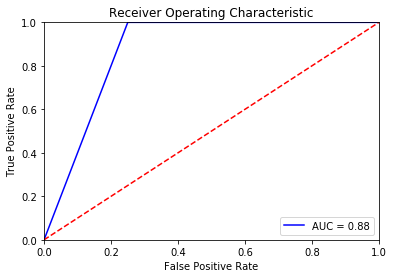

In [57]:
#plotting ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_stack)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Model Scoring
1. Accuracy :: 93%

2. Re-call :: 100%

3. Precision :: 91%

4. F1-Score :: 96%

Ratio in target variable is 75% to 25% so we will take f1-score i.e. 96% as our scoring method

ROC-AUC : 87%

In [61]:
#creating model of Random Forest
RandomForest = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features=15)
RandomForest = RandomForest.fit(X_train, Y_train)

# predict the response
RandomForest_pred = RandomForest.predict(X_test)

In [62]:
# Let's measure the accuracy of this model's prediction
print("confusion_matrix")
print(confusion_matrix(Y_test,RandomForest_pred))

confusion_matrix
[[14  2]
 [ 1 42]]


In [63]:
# evaluate Model Score
print(classification_report(Y_test, RandomForest_pred, digits=2))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.95      0.98      0.97        43

    accuracy                           0.95        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.95      0.95      0.95        59



In [64]:
#determining false positive rate and True positive rate, threshold
fpr, tpr, threshold = metrics.roc_curve(Y_test, RandomForest_pred)
roc_auc_rf = metrics.auc(fpr, tpr)
# print AUC
print("AUC : % 1.4f" %(roc_auc_rf)) 

AUC :  0.9259


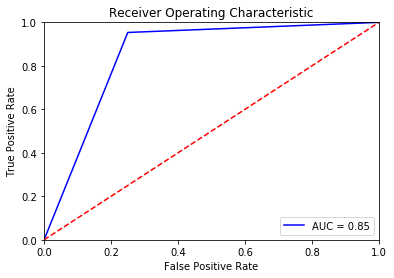

In [50]:
#plotting ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Model Scoring
1. Accuracy :: 95%

2. Re-call :: 98%

3. Precision :: 95%

4. F1-Score :: 97%

Ratio in target variable is 75% to 25% so we will take f1-score i.e. 97% as our scoring method

ROC-AUC : 92%

In [65]:
# Lets check features importance
feature_imp = pd.Series(RandomForest.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

spread1             0.194694
PPE                 0.150497
MDVP:Fo(Hz)         0.124526
MDVP:Flo(Hz)        0.086725
D2                  0.066680
RPDE                0.058717
Shimmer:APQ5        0.056173
spread2             0.048961
MDVP:APQ            0.048613
HNR                 0.027420
Shimmer:APQ3        0.026375
MDVP:Jitter(Abs)    0.025391
MDVP:Shimmer(dB)    0.023566
Shimmer:DDA         0.022413
MDVP:PPQ            0.018861
MDVP:Jitter(%)      0.013354
MDVP:Shimmer        0.007035
dtype: float64

Text(0, 0.5, 'Features')

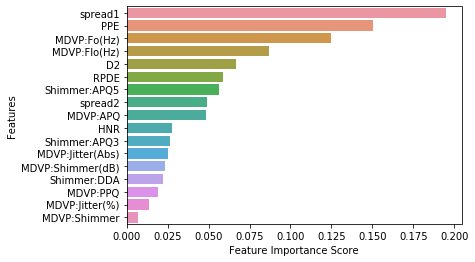

In [66]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

In [43]:
#create and fit the model
AdBs = AdaBoostClassifier( n_estimators= 50)
AdBs  = AdBs.fit(X_train, Y_train)

# predict the response
AdBs_pred = AdBs.predict(X_test)

In [44]:
# Let's measure the accuracy of this model's prediction
print("confusion_matrix")
print(confusion_matrix(Y_test,AdBs_pred))

confusion_matrix
[[12  4]
 [ 3 40]]


In [45]:
# evaluate Model Score
print(classification_report(Y_test, AdBs_pred, digits=2))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.91      0.93      0.92        43

    accuracy                           0.88        59
   macro avg       0.85      0.84      0.85        59
weighted avg       0.88      0.88      0.88        59



In [47]:
#determining false positive rate and True positive rate, threshold
fpr, tpr, threshold = metrics.roc_curve(Y_test, AdBs_pred)
roc_auc_ada = metrics.auc(fpr, tpr)
# print AUC
print("AUC : % 1.4f" %(roc_auc_ada)) 

AUC :  0.8401


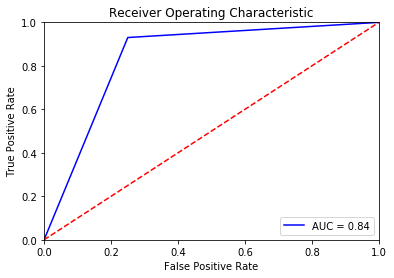

In [48]:
#plotting ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Model Scoring
1. Accuracy :: 88%

2. Re-call :: 93%

3. Precision :: 91%

4. F1-Score :: 92%

Ratio in target variable is 75% to 25% so we will take f1-score i.e. 92% as our scoring method

ROC-AUC : 84%

In [68]:
#Using K fold to check how my algorighm varies throughout my data if we split it in 10 equal bins
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors = 17, weights = 'uniform', metric='euclidean')))
models.append(('SVM', SVC(gamma=0.05, C=3)))
models.append(('Stacking', StackingClassifier(estimators=level0, final_estimator=level1, cv=5)))
models.append(('Random Forest', RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features=15)))
models.append(('Adaptive Boosting', AdaBoostClassifier( n_estimators= 50)))

# evaluate each model
results = []
names = []
scoring = 'f1'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=101)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	print("Name = %s , Mean F1 = %f, SD F1 = %f" % (name, cv_results.mean(), cv_results.std()))

Name = Logistic Regression , Mean F1 = 0.904951, SD F1 = 0.075430
Name = K-NN , Mean F1 = 0.891444, SD F1 = 0.062346
Name = SVM , Mean F1 = 0.914495, SD F1 = 0.029238
Name = Stacking , Mean F1 = 0.937822, SD F1 = 0.045995
Name = Random Forest , Mean F1 = 0.937564, SD F1 = 0.052696
Name = Adaptive Boosting , Mean F1 = 0.931860, SD F1 = 0.045419


[Text(0, 0, 'Logistic Regression'),
 Text(0, 0, 'K-NN'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'Stacking'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'Adaptive Boosting')]

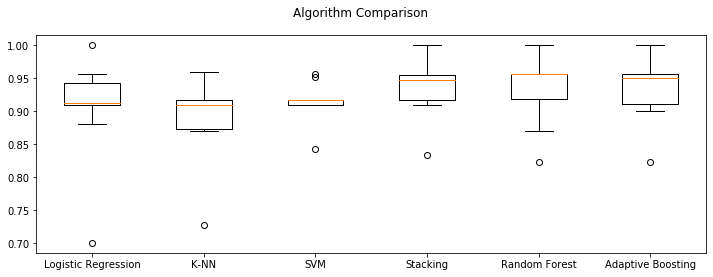

In [69]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)

In [70]:
#Using K fold to check how my algorighm varies throughout my data if we split it in 10 equal bins
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors = 17, weights = 'uniform', metric='euclidean')))
models.append(('SVM', SVC(gamma=0.05, C=3)))
models.append(('Stacking', StackingClassifier(estimators=level0, final_estimator=level1, cv=5)))
models.append(('Random Forest', RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features=15)))
models.append(('Adaptive Boosting', AdaBoostClassifier( n_estimators= 50)))

# evaluate each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=101)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	print("Name = %s , Mean Accuracy = %f, SD Accuracy = %f" % (name, cv_results.mean(), cv_results.std()))

Name = Logistic Regression , Mean Accuracy = 0.847802, SD Accuracy = 0.107278
Name = K-NN , Mean Accuracy = 0.817033, SD Accuracy = 0.096524
Name = SVM , Mean Accuracy = 0.860440, SD Accuracy = 0.038477
Name = Stacking , Mean Accuracy = 0.896703, SD Accuracy = 0.037005
Name = Random Forest , Mean Accuracy = 0.913187, SD Accuracy = 0.069795
Name = Adaptive Boosting , Mean Accuracy = 0.897802, SD Accuracy = 0.056098


[Text(0, 0, 'Logistic Regression'),
 Text(0, 0, 'K-NN'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'Stacking'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'Adaptive Boosting')]

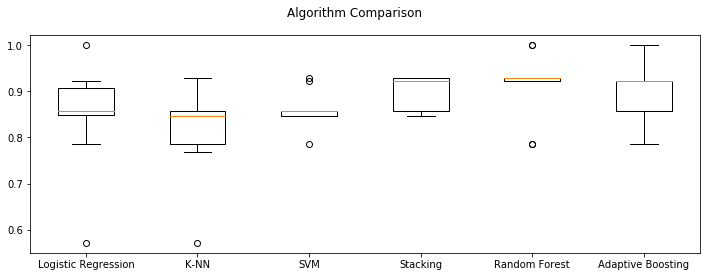

In [71]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)

# Conclusion
Random forest algorithm performs better in terms of overall performace.

Average Accuracy over data is 91% with Standard Deviation of 7% and F1-Score of 93% with Standard Deviation of 5%